# Pythonで感染病の数学予測モデル「SIRモデル」をアニメーションで理解する

## ライブラリの読み込み

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## 微分方程式をつくる

<a href="https://gyazo.com/a6349c06cab42e4ea7638306fc9bb09f"><img src="https://i.gyazo.com/a6349c06cab42e4ea7638306fc9bb09f.jpg" alt="Image from Gyazo" width="70%"/></a>

<img src="https://i.gyazo.com/870f3c4e68b8e0125e0cf0da2845c046.jpg" width="40%">

In [0]:
def SIR_EQ(v, t, beta, gamma):
    '''
    [v[0], v[1], v[2]] = [S, I, R]

    dSdt = - beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    '''

    dSdt = - beta * v[0] * v[1]
    dIdt = beta * v[0] * v[1] - gamma * v[1]
    dRdt = gamma * v[1]

    return [dSdt, dIdt, dRdt]

## パラメータの設定

### 日数

In [0]:
# 日数の最大値
day_max = 150
# グラフにおいて、何日ごとに数値を求めるか
dt = 0.01

### 人数

- S=susceptible 感染可能者
- I=Infectious 感染者
- R=Removed 感染後死亡or免疫獲得者

In [0]:
S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0]  #[S[0], I[0], R[0]]

### 感染率、回復率

In [0]:
infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

# SIRモデルに適応できるように
beta = infection_rate / N_total
gamma = recovery_rate

### 微分方程式を解く

In [0]:
times = np.arange(0, day_max, dt)
args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数

result = odeint(SIR_EQ, ini_state, times, args)

## resultの中身を確認する

numpy.ndarray形式

In [17]:
result

array([[9.90000000e+01, 1.00000000e+00, 0.00000000e+00],
       [9.89973096e+01, 1.00238003e+00, 3.10369000e-04],
       [9.89946129e+01, 1.00476565e+00, 6.21476643e-04],
       ...,
       [1.83014271e-02, 1.81093375e+00, 9.81707648e+01],
       [1.83005276e-02, 1.81037334e+00, 9.81713261e+01],
       [1.82996285e-02, 1.80981311e+00, 9.81718873e+01]])

pandasを使用する

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(result, columns=["susceptible", "infectious", "removed"])

In [0]:
# 数値の表示形式を変更する
# floatの表示方法を、小数点以下3桁で設定する
pd.options.display.float_format = '{:.3f}'.format

In [21]:
df

,susceptible,infectious,removed
0,99.000,1.000,0.000
1,98.997,1.002,0.000
2,98.995,1.005,0.001
3,98.992,1.007,0.001
4,98.989,1.010,0.001
...,...,...,...
14995,0.018,1.812,98.170
14996,0.018,1.811,98.170
14997,0.018,1.811,98.171
14998,0.018,1.810,98.171


↑ dt = 0.01ごとの数値を計算できた

## susceptible, infectious, removedごとにplotしてみる

susceptibleは、

In [22]:
result[:, 0]

array([9.90000000e+01, 9.89973096e+01, 9.89946129e+01, ...,
       1.83014271e-02, 1.83005276e-02, 1.82996285e-02])

同様に

In [23]:
# infectious
result[:, 1]

array([1.        , 1.00238003, 1.00476565, ..., 1.81093375, 1.81037334,
       1.80981311])

In [24]:
# removed
result[:, 2]

array([0.00000000e+00, 3.10369000e-04, 6.21476643e-04, ...,
       9.81707648e+01, 9.81713261e+01, 9.81718873e+01])

plotする

(0.0, 100.0)

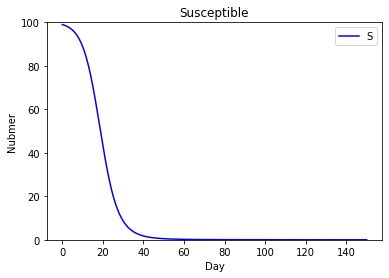

In [25]:
plt.plot(times, result[:, 0], color="blue")
plt.legend("Susceptible")  # 凡例
plt.title("Susceptible")  # タイトル
plt.xlabel("Day")  # x軸ラベル
plt.ylabel("Nubmer")  # y軸ラベル
plt.ylim([0, 100])  # y軸の表示範囲

(0.0, 100.0)

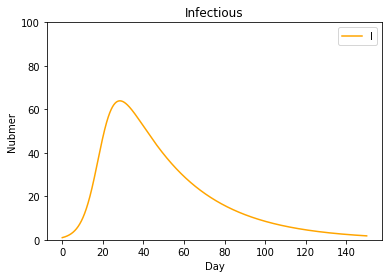

In [26]:
plt.plot(times, result[:, 1], color="orange")
plt.legend("Infectious")
plt.title("Infectious")
plt.xlabel("Day")
plt.ylabel("Nubmer")
plt.ylim([0, 100])

(0.0, 100.0)

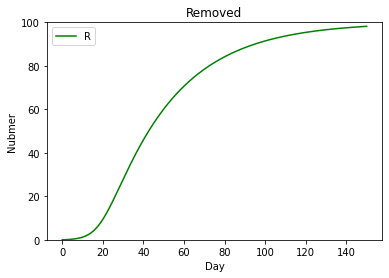

In [27]:
plt.plot(times, result[:, 2], color="green")
plt.legend("Removed")
plt.title("Removed")
plt.xlabel("Day")
plt.ylabel("Nubmer")
plt.ylim([0, 100])

全体をまとめてplotすると

Text(0, 0.5, 'Nubmer')

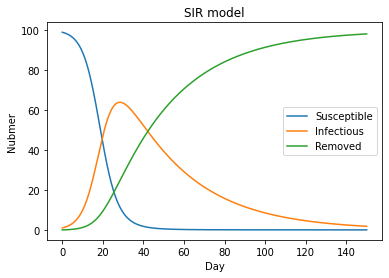

In [28]:
#plot
plt.plot(times, result)
plt.legend(['Susceptible','Infectious', 'Removed'])
plt.title("SIR model")
plt.xlabel("Day")
plt.ylabel("Nubmer")

## パラメータを変えて、比較してみる

### vulの値を変える

感染防止の対策の度合いによって、vulを1以下の値で設定。  
全く対策をしない自然の場合が、vul=1.0

参考：[数値シミュレーションによる検討 – COVID-19情報共有 — COVID19-Information sharing](https://www.fttsus.jp/covinfo/numerical-simulation/)

vul = 1.0の場合（上記と同じ設定）で、これまでの内容をまとめておくと

Text(0, 0.5, 'Nubmer')

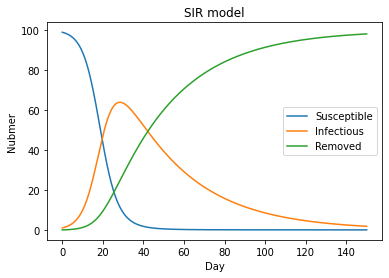

In [29]:
# パラメータ
day_max = 150  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0]  #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

vul = 1.0
beta = infection_rate / N_total * vul
gamma = recovery_rate

times = np.arange(0, day_max, dt)
args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数

result = odeint(SIR_EQ, ini_state, times, args)
#plot
plt.plot(times, result)
plt.legend(['Susceptible','Infectious', 'Removed'])
plt.title("SIR model")
plt.xlabel("Day")
plt.ylabel("Nubmer")

vulの値を1.0, 0.5, 0.2, 0.1に変える

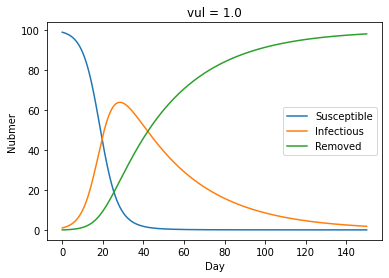

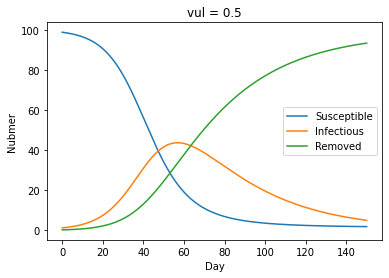

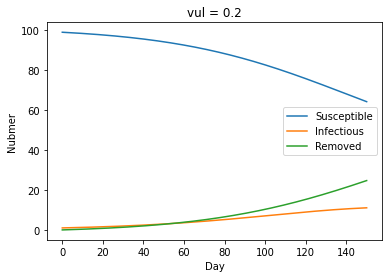

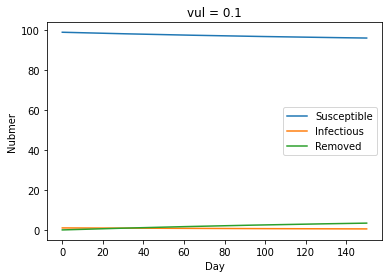

In [30]:
day_max = 150  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0] #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

# vulの値を変えて
for vul in [1.0, 0.5, 0.2, 0.1]:
    # SIRモデルに適応できるように
    beta = infection_rate / N_total * vul
    gamma = recovery_rate

    #numerical integration
    times = np.arange(0, day_max, dt)
    args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数

    #Numerical Solution using scipy.integrate
    #Solver SIR model
    result = odeint(SIR_EQ, ini_state, times, args)
    #plot
    plt.plot(times,result)
    plt.legend(['Susceptible','Infectious', 'Removed'])
    plt.title("vul = " + str(vul))
    plt.xlabel("Day")
    plt.ylabel("Nubmer")
    plt.show()

### 日数を変えてみる

日数を300日で見てみる

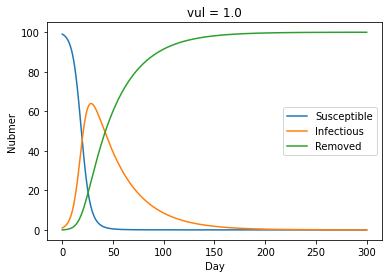

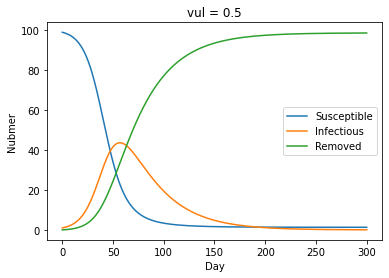

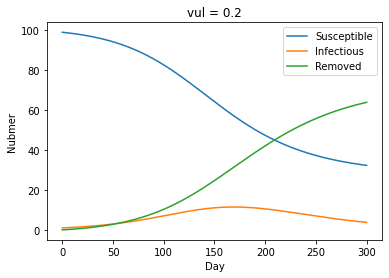

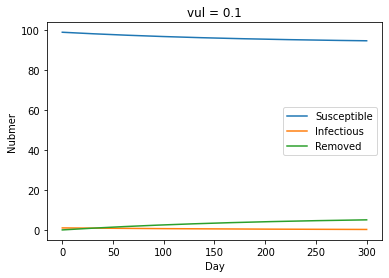

In [31]:
day_max = 300  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0] #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

# vulの値を変えて
for vul in [1.0, 0.5, 0.2, 0.1]:
    # SIRモデルに適応できるように
    beta = infection_rate / N_total * vul
    gamma = recovery_rate

    #numerical integration
    times = np.arange(0, day_max, dt)
    args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数

    #Numerical Solution using scipy.integrate
    #Solver SIR model
    result = odeint(SIR_EQ, ini_state, times, args)
    #plot
    plt.plot(times,result)
    plt.legend(['Susceptible','Infectious', 'Removed'])
    plt.title("vul = " + str(vul))
    plt.xlabel("Day")
    plt.ylabel("Nubmer")
    plt.show()

ほかにも
- 人口
- 感染率、回復率  

など、様々なパラメータを変えてシミュレーションができる

## アニメーションをつくる

vulの値を動かしたとき

In [0]:
from matplotlib import animation
from IPython.display import HTML

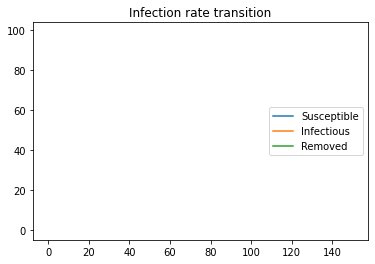

In [35]:
fig = plt.figure()
ims = []

day_max = 150  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0] #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

for vul in [1.0, 0.5, 0.2, 0.1]:
    # SIRモデルに適応できるように
    beta = infection_rate / N_total * vul
    gamma = recovery_rate
    
    #numerical integration
    times =np.arange(0,day_max, dt)
    args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数
    # 計算
    result = odeint(SIR_EQ, ini_state, times, args)

    img = plt.plot(times,result)
    plt.title("Infection rate transition")
    plt.legend(['Susceptible','Infectious', 'Removed'])

    ims.append(img) # グラフを配列に追加

# 100枚のプロットを 100ms ごとに表示するアニメーション
ani = animation.ArtistAnimation(fig, ims, interval=300)
# plt.show()
HTML(ani.to_jshtml())

### colorを固定する

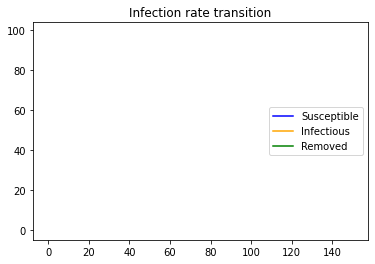

In [37]:
fig = plt.figure()
ims = []
flag_legend = True  # 凡例描画のフラグ

day_max = 150  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0] #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

for vul in [1.0, 0.5, 0.2, 0.1]:
    # SIRモデルに適応できるように
    beta = infection_rate / N_total * vul
    gamma = recovery_rate
    
    #numerical integration
    times =np.arange(0,day_max, dt)
    args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数
    # 計算
    result = odeint(SIR_EQ, ini_state, times, args)
    
    # 3つに分けてplot
    plt.title("Infection rate transition")
    im1 = plt.plot(times, result[:, 0], label="Susceptible", color="blue")
    im2 = plt.plot(times, result[:, 1], label="Infectious", color="orange")
    im3 = plt.plot(times, result[:, 2], label="Removed", color="green")
    
    if flag_legend:  # 一回のみ凡例を描画
        plt.legend(loc="best")
        flag_legend = False
        
    ims.append(im1 + im2 + im3)  # グラフを配列に追加

# 100枚のプロットを 100ms ごとに表示するアニメーション
ani = animation.ArtistAnimation(fig, ims, interval=300)
# plt.show()
HTML(ani.to_jshtml())

### vulの値を小刻みにする

0から1まで0.05きざみで

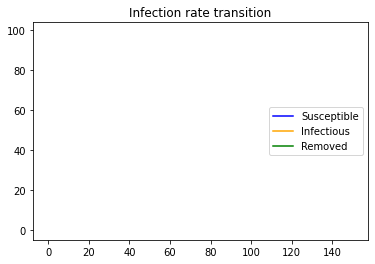

In [38]:
fig = plt.figure()
ims = []
flag_legend = True  # 凡例描画のフラグ

day_max = 150  # 日数の最大値
dt = 0.01  # グラフにおいて、何日ごとに数値を求めるか

S_0 = 99
I_0 = 1
R_0 = 0
N_total = S_0 + I_0 + R_0  # 人口
ini_state = [S_0, I_0, R_0] #[S[0], I[0], R[0]]

infection_rate = 0.271438  # 感染率
recovery_rate = 0.031  # 回復率

for vul in [i / 100 for i in range(0, 105, 5)]:
    # SIRモデルに適応できるように
    beta = infection_rate / N_total * vul
    gamma = recovery_rate
    
    #numerical integration
    times =np.arange(0,day_max, dt)
    args = (beta, gamma)  # scipy.odeintに渡す、微分方程式の追加の引数
    # 計算
    result = odeint(SIR_EQ, ini_state, times, args)
    
    # 3つに分けてplot
    plt.title("Infection rate transition")
    im1 = plt.plot(times, result[:, 0], label="Susceptible", color="blue")
    im2 = plt.plot(times, result[:, 1], label="Infectious", color="orange")
    im3 = plt.plot(times, result[:, 2], label="Removed", color="green")
    
    if flag_legend:  # 一回のみ凡例を描画
        plt.legend(loc="best")
        flag_legend = False
        
    ims.append(im1 + im2 + im3)  # グラフを配列に追加

# 100枚のプロットを 100ms ごとに表示するアニメーション
ani = animation.ArtistAnimation(fig, ims, interval=300)
# plt.show()
HTML(ani.to_jshtml())

### MP4またはgifとして保存する

(Google Colabの環境では保存は少々ややこしいです)

In [0]:
ani.save('sir-10_100_5-color.mp4', writer="ffmpeg")

In [0]:
ani.save('sir_test-10_100_5-color.gif', writer='imagemagick', fps=20)